<a href="https://colab.research.google.com/github/calderonf/CursoMachineLearning/blob/master/Codigo/Regresion_logistica_Regularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresion Logistica + Regularización

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

from scipy.spatial import distance# por favor buscar la documentacion oficial de la función https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance
from sklearn.preprocessing import StandardScaler# por favor buscar la documentacion oficial de la función
#https://scikit-learn.org/stable/modules/preprocessing.html
%matplotlib inline
#https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
from sklearn.datasets import make_blobs
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
from sklearn.datasets import make_circles

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

(1500, 3)
(1500, 4)
(1500, 6)
(1500, 8)
(1500, 10)


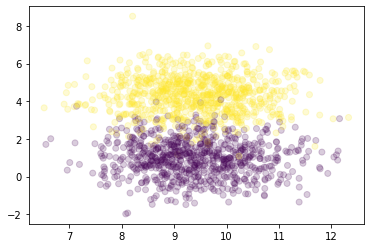

In [78]:
Xoriginal, ytotal = make_blobs(n_samples = 1500, centers = 2, n_features=2, shuffle=True, random_state=4)#4 y 30 da un buen cluster para probar
#Xtotal, ytotal = make_circles(n_samples=1500, shuffle=True, noise=0.1, random_state=4, factor=0.4)
#Vamos a aumentar la complejidad de la hipótesis

#tenemos X1 y X2 vamos a tomar una hipótesis
idx1=1
idx2=2
xsize=len(Xoriginal)
#h(X)=c0X0+C1X1+C2X2+C3X1*X2+C4X1^2+C5X2^2+C6X1^3+C7X2^3+C8X1^4+C9X2^4
#Primera constante, c0X0 con X0=1:
Xtotal=np.hstack((np.ones((xsize, 1)),Xoriginal))
print(np.shape(Xtotal))
# C3X1*X2
Xtotal=np.hstack(  (Xtotal,(Xoriginal[:,0]*Xoriginal[:,1]).reshape((xsize, 1)))  )
print(np.shape(Xtotal))
#C4X1^2+C5X2^2
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,2)))
print(np.shape(Xtotal))
#C6X1^3+C7X2^3
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,3)))
print(np.shape(Xtotal))
#C8X1^4+C9X2^4
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,4)))
print(np.shape(Xtotal))

plt.figure()
plt.scatter(Xtotal[:,idx1],Xtotal[:,idx2],c=ytotal,alpha=0.2)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()
X_train, X_test, y_train, y_test = train_test_split(Xtotal, ytotal, random_state=0)

#scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
#scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [79]:
# ver https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

LR = LogisticRegression(penalty='l2',max_iter=1000, C=1000,random_state=0)

LR.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

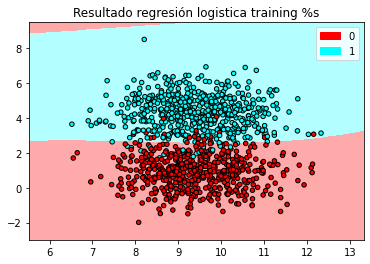

In [80]:
X=X_train
y=y_train

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, idx1].min() - 1, X[:, idx1].max() + 1
y_min, y_max = X[:, idx2].min() - 1, X[:, idx2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[np.zeros_like(xx.ravel()),xx.ravel(), yy.ravel(),xx.ravel()* yy.ravel(),xx.ravel()*xx.ravel(), yy.ravel()* yy.ravel(),xx.ravel()*xx.ravel()*xx.ravel(), yy.ravel()*yy.ravel()* yy.ravel(),xx.ravel()*xx.ravel()*xx.ravel()*xx.ravel(), yy.ravel()*yy.ravel()* yy.ravel()* yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, idx1], X[:, idx2], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
plt.legend(handles=[patch0, patch1])
 
    
plt.title("Resultado regresión logistica training %s")
 
plt.show()

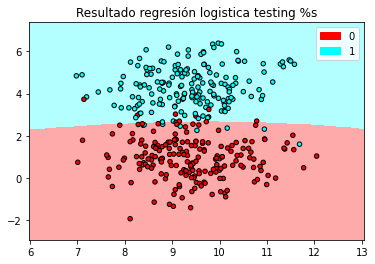

In [74]:
X=X_test
y=y_test

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, idx1].min() - 1, X[:, idx1].max() + 1
y_min, y_max = X[:, idx2].min() - 1, X[:, idx2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[np.zeros_like(xx.ravel()),xx.ravel(), yy.ravel(),xx.ravel()* yy.ravel(),xx.ravel()*xx.ravel(), yy.ravel()* yy.ravel(),xx.ravel()*xx.ravel()*xx.ravel(), yy.ravel()*yy.ravel()* yy.ravel(),xx.ravel()*xx.ravel()*xx.ravel()*xx.ravel(), yy.ravel()*yy.ravel()* yy.ravel()* yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, idx1], X[:, idx2], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
plt.legend(handles=[patch0, patch1])
 
    
plt.title("Resultado regresión logistica testing %s")
 
plt.show()

matthews_corrcoef 0.9036920545026352
Accuracy 0.952


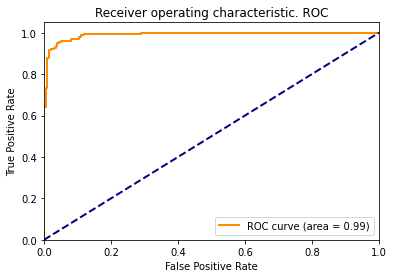

In [75]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

y_test_predicted = LR.predict(X_test)
y_test_scores = LR.predict_proba(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
"""
print(y_test_scores[:,1])
print(y_test_predicted)
"""
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()